# Tutorial


The pairs of galaxies are abundant interaction systems in the Universe and of great interest due to the different phenomena that
there, regions where stellar formation is induced by pressure gradients are presented as deformations by tidal forces,
morphological transformation among others. Some of these phenomena are first analyzed by visual inspection of the
object or system of interest. 

This tutorial introduces you to the *Sky COllector of galaxy Pairs and Image Output* project
(`SCORPIO`), a Python library to generate analyze an interaction between a pairs of galaxies from their location (RA, DEC) and offset to the
Red. 

The code allows collecting data information in the SDSS, 2MASS or WISE surveys, in the respective filters available

> Interactive version of this tutorial: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/josegit88/SCORPIO/HEAD?filepath=docs%2Fsource%2Ftutorial.ipynb)


First you need to import the packages with

In [1]:
import scorpio

Then we can proceed to use the `scorpio.gpair` function to extract the interaction of two nearby galaxies, on the [* Sloan Digital Sky Survey *](https://www.sdss.org/) (SDSS), obtaining an image with a resolution of $ 500 x $ 500 pixels.

In [2]:
gpi = scorpio.gpair(
    
    # first galaxy
    ra1=234.47982166000000,
    dec1=27.915027615521904,
    z1=0.13499665999999999,
    
    # second galaxy
    ra2=234.48308671000001,
    dec2=27.913794015521905,
    z2=0.13481650000000001,
    
    # survey and image resolution
    survey="SDSS",
    resolution=500,
)

gpi

GPInteraction(ra1=234.47982166, dec1=27.915027615521904, z1=0.13499666, ra2=234.48308671, dec2=27.913794015521905, z2=0.1348165, survey='SDSS', resolution=500, cosmology=FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486))

The returned objest is calles `GPInteraction` (Galaxy Pair Interaction), and it has all the information sent to the `scorpio.gpair` function, as well as attributes related to the interaction of these two galaxies. These resulting attributes are identified by ending with the underscore (`_`).

For example if we want to check the distance between the two galaxies in $Mpc$

In [3]:
gpi.dist_physic_

<Quantity 27.88938381 Mpc>

## Plot

The `GPInteraction` object has some plot capabilities useful to clean the data, and check visually the interaction

<AxesSubplot:title={'center':'Interaction - Survey: SDSS - Cosmology: Planck15'}, xlabel='RA', ylabel='Dec'>

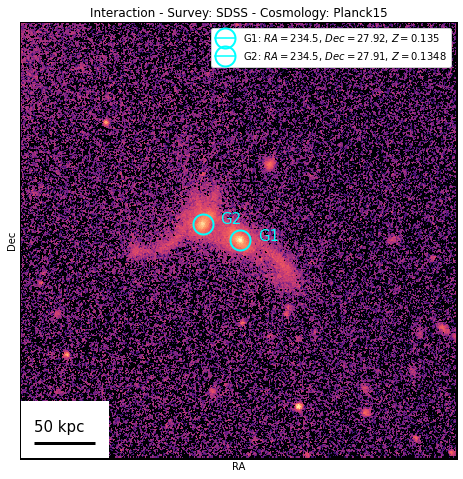

In [4]:
gpi.plot()

O si prefiere se pueden cambiar la paleta de colores (`cmap`) y el color de los centros (`center_color`)

<AxesSubplot:title={'center':'Interaction - Survey: SDSS - Cosmology: Planck15'}, xlabel='RA', ylabel='Dec'>

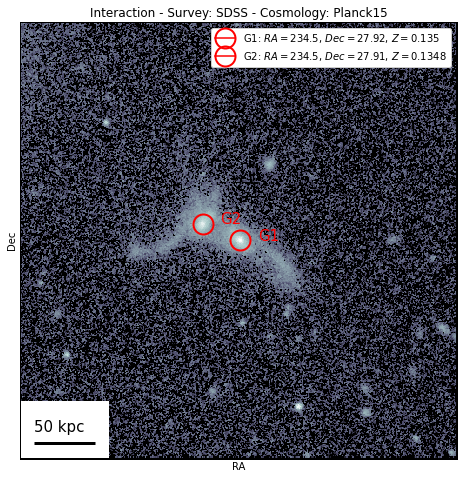

In [5]:
gpi.plot(cmap="bone", center_color="red")

Also the scale information ,legend, centers can be disabled

<AxesSubplot:title={'center':'Interaction - Survey: SDSS - Cosmology: Planck15'}, xlabel='RA', ylabel='Dec'>

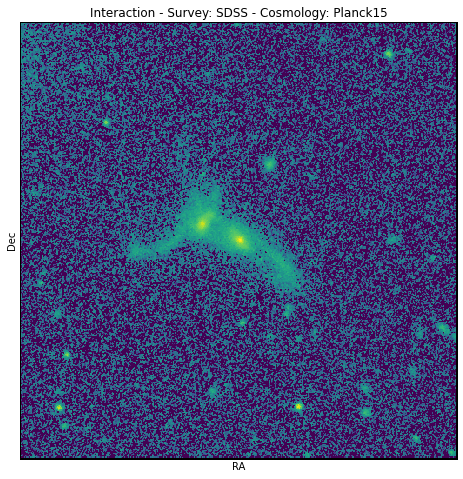

In [6]:
gpi.plot(cmap="viridis", center_color="red", center=False, scale=False)

Another useful option, is to bring to a single value all the values that are below a certain limit, this is achieved with the parameter `llimit` (low limit)

<AxesSubplot:title={'center':'Interaction - Survey: SDSS - Cosmology: Planck15'}, xlabel='RA', ylabel='Dec'>

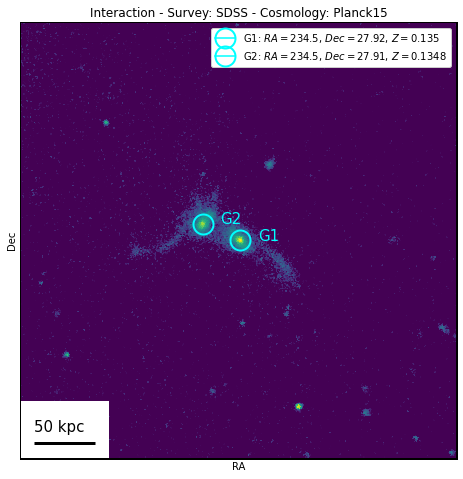

In [7]:
gpi.plot(llimit=.1, cmap="viridis")

## Plot - Advanced

> Note: We assume the knowledge of matplotlib from here on. More info: [Matpltolib Homepage](https://matplotlib.org/)

`.plot()` is capable of receiving an on which to draw, for example we can create two axes, and in the first create a histogram with the intensities of the image, and in the second add the interaction plot

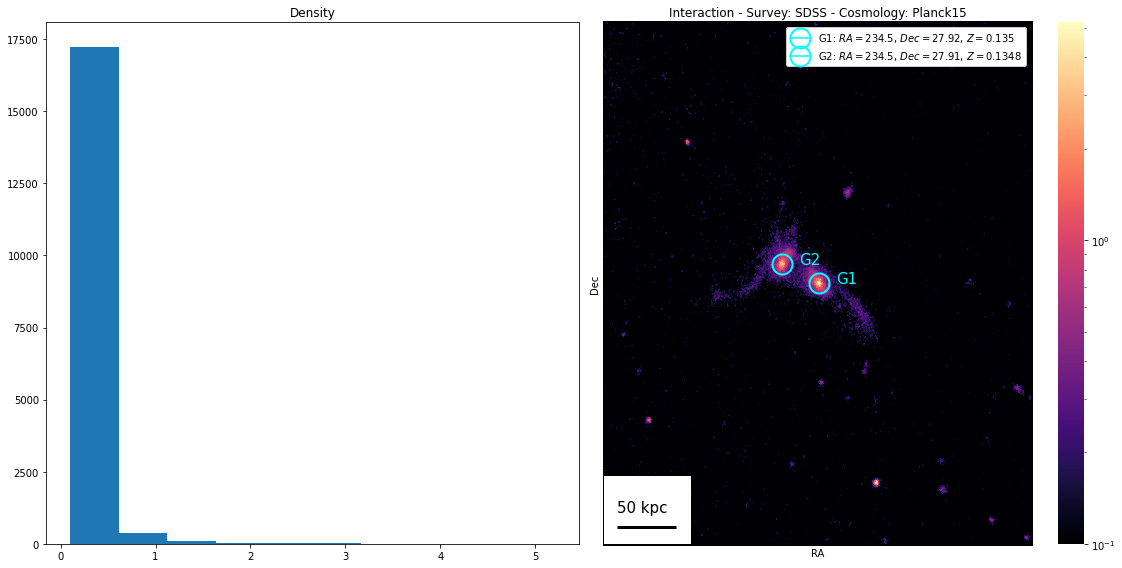

In [8]:
import matplotlib.pyplot as plt # first we import matplotlib
  
# Then we create two axis with bigger size
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# then we create the histogram
mtx = gpi.mtx_[0]
arr = mtx[mtx > 0.1].flatten()  # most of pixels are clossest to 0
axs[0].hist(arr)
axs[0].set_title("Density")

# in the second axis we draw the interaction, with a colorbar to check where is the values
# of the histogram
gpi.plot(ax=axs[1], llimit=0.1, heatmap_kws={"cbar": True, "square": False})

fig.tight_layout()